# OpenCV Tutorial: A Guide to Learn OpenCV 

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
cd gdrive/My\ Drive/Colab\ Notebooks/dl_vision/day1

/content/gdrive/My Drive/Colab Notebooks/dl_vision/day1


In [4]:
ls

 datasets/                      st_02_1_Perceptron.ipynb
 ML_DL_TEST.ipynb               st_02_2_NeuralNetwork.ipynb
 module/                        st_02_3_NN_Keras_MNIST.ipynb
'st_01_OpenCV Tutorial.ipynb'   st_02_4_NN_Keras_Cifar10.ipynb


### Loading and displaying an image

opencv imread 메서드로 로드한 image는 실제로 NumPy 배열입니다.

image.shape을 호출하여 높이, 너비, 깊이를 추출합니다.
* 행의 수는 높이
* 열의 수는 너비
* 깊이는 채널 수

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import imutils
import cv2

In [12]:
# insert code.
image = cv2.imread("./datasets/jp.png")

In [13]:
image.shape

(322, 600, 3)

In [14]:
h, w ,d = image.shape

width=600, height=322, depth=3


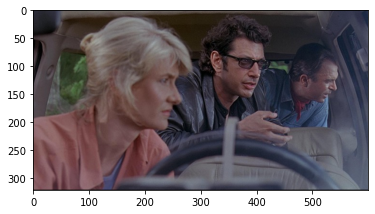

In [16]:
print("width={}, height={}, depth={}".format(w, h, d))

plt.imshow(image[:, :) # BGR 순서
#plt.imshow(image[:, :,[2,1,0]]) RGB 순서
#plt.imshow(image[:, :,::-1]) RGB 순서

### Accessing individual pixels

색상 순서는 RGB가 아닌 BGR 입니다. 이것은 OpenCV가 처음 개발되었을 때 수년 전에 표준이 BGR 순서이었기 때문입니다. 수년에 걸쳐 이 표준은 이제 RGB가 되었지만 OpenCV는 기존 코드와의 호환성을 위해 이 “레거시” BGR 순서를 유지합니다.

In [17]:
(B, G, R) = image[100, 50]

print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


### Array slicing and cropping

“관심 영역”(ROI)을 추출하는 것은 이미지 처리에 중요한 기술입니다.

배열 슬라이스는 image[startY:endY, startX:endX] 형식으로 작성합니다.

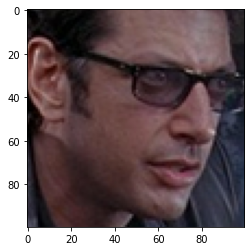

In [18]:
# width : 320 to 420, height : 60 to 160
roi = image[60:160,320:420]
plt.imshow(roi[:,:,::-1])

### Resizing images

먼저, 이미지 종횡비를 무시하고 크기를 조정해보겠습니다.     

가로 세로 비율을 고려하지 않았기 때문에 왜곡되었습니다.

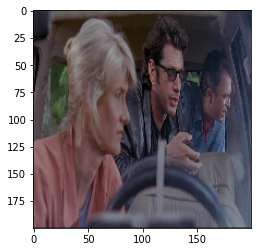

In [20]:
# resize the image to 200x200px, ignoring aspect ratio
resized_img = cv2.resize(image,(200,200))
plt.imshow(resized_img[:,:,::-1])

새로운 너비와 이전 너비의 비율을 계산합니다.

In [ ]:
# 종횡비를 고려해서 이미지 변환. width를 300으로 변환.

In [21]:
r = 300/w

In [22]:
dim = (300,int(h*r))

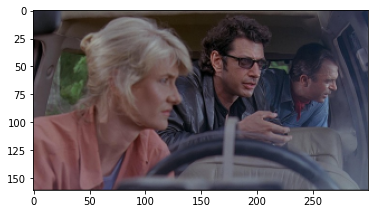

In [23]:
resized = cv2.resize(image, dim)

plt.imshow(resized[:, :, ::-1])

이미지 크기를 조정할 때마다 가로 세로 비율을 계산하는 것은 imutils 내의 함수에 코드를 래핑되어 있습니다.

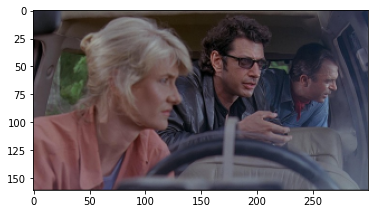

In [27]:
resized = imutils.resize(image, width=300)

plt.imshow(resized[:, :, ::-1])

### Rotating an image

중심점을 기준으로 이미지를 회전하려면 먼저 이미지의 중심 (x, y) 좌표를 계산해야 합니다.

참고 : 정수 계산 (즉, 부동 소수점 값 없음)을 수행하기 위해 //를 사용합니다.

In [ ]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.imshow(rotated[:, :, ::-1])

이제 imutils를 사용하여 한 줄의 코드로 동일한 작업을 수행해 보겠습니다.

In [ ]:
rotated = imutils.rotate(image, -45)

plt.imshow(rotated[:, :, ::-1])

OpenCV는 회전 후에 이미지가 잘리고 보이지 않더라도 고려하지 않습니다. 이 작업은 매우 번거롭기 때문에 여기 전체 이미지를 볼 수 있는 imutils 버전이 있습니다. 이를 rotate_bound라고 부릅니다.

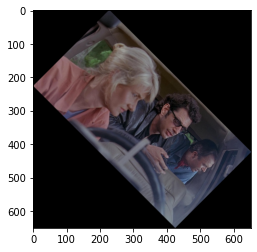

In [28]:
rotated = imutils.rotate_bound(image, 45)

plt.imshow(rotated[:, :, ::-1])

### Smoothing an image

많은 이미지 처리 파이프 라인에서 **고주파 노이즈를 줄이기 위해 이미지를 흐리게 처리(blur)**해야 알고리즘이 노이즈가 아닌 이미지의 실제 내용을 보다 쉽게 감지하고 이해할 수 있습니다. 

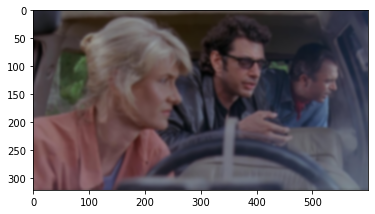

In [35]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise

blurred = cv2.GaussianBlur(image,(11,11),0) # (11,11) -> 홀수로 만들어야돼
plt.imshow(blurred[:,:,::-1])

### Drawing on an image

입력 이미지에 직사각형, 원, 선을 그립니다. 또한 이미지 위에 텍스트를 오버레이 합니다.

Drawing Rectangle

In [36]:
output = image.copy()

In [37]:
# draw a 2px thick red rectangle surrounding the face
# top-left point (320, 60), bottom-right(420, 160)
# color red, line thickness 2

# insert code
cv2.rectangle(output,(320, 60),(420, 160),(0,0,255),2 );

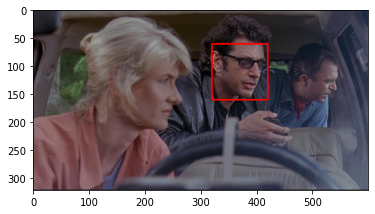

In [38]:
plt.imshow(output[:, :, ::-1])

Drawing Circle

In [39]:
output = image.copy()

In [42]:
# draw a blue 20px (filled in) circle on the image centered at x=300, y=150
# color blue, line thickness 2 (-1 is fullfill)

# insert code
cv2.circle(output, (300,150),20,(255,0,0),2);
# cv2.circle(output, (300,150),20,(255,0,0),-1); 원안을 채우는거

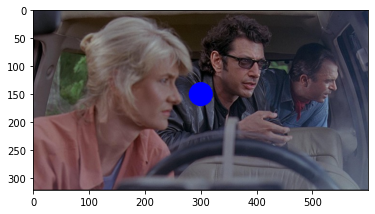

In [43]:
plt.imshow(output[:, :, ::-1])

Drawing Line

In [44]:
output = image.copy()

In [45]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
# color green, line thickness 5 

# insert code
cv2.line(output, (60,20),(400,200),(0,255,0),5);

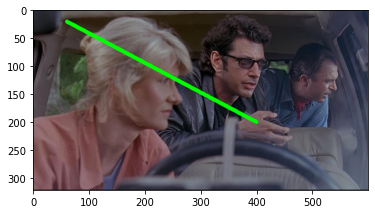

In [46]:
plt.imshow(output[:, :, ::-1])

OpenCV의 putText 함수는 이미지에 텍스트를 그립니다. 

In [47]:
output = image.copy()
text = "OpenCV + Jurassic Park!!!"

In [48]:
# draw green text on the image
# Bottom-left corner x=10, y=25
# fontFace = cv2.FONT_HERSHEY_SIMPLEX
# fontScale = 0.7, color is green, thickness is 2

# insert code
cv2.putText(output,text,(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2);

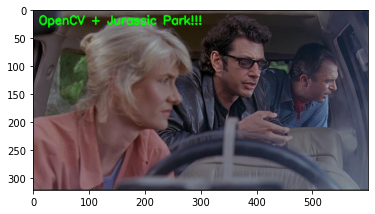

In [49]:
plt.imshow(output[:, :, ::-1])

## Counting objects

다음 몇 섹션에서는 간단한 Python + OpenCV 스크립트를 작성하여 다음 이미지에서 Tetris 블록 수를 계산하는 방법을 학습합니다.

여기서 다음의 방법들을 살펴볼 것입니다.

* OpenCV로 이미지를 그레이 스케일로 변환하는 방법 배우기
* 가장자리 감지 수행하기
* 그레이 스케일 이미지의 임계 값 설정
* 윤곽선 찾기, 카운팅, 그리기
* 침식(erosion)과 팽창(dilation) 수행
* 이미지 마스킹

In [50]:
import imutils
import cv2

In [ ]:
args = {'image' : 'tetris_blocks.png'}

### Converting an image to grayscale

cv2.cvtColor를 호출하고 image와 cv2.COLOR_BGR2GRAY 플래그를 제공하여 이미지를 그레이 스케일로 변환합니다.

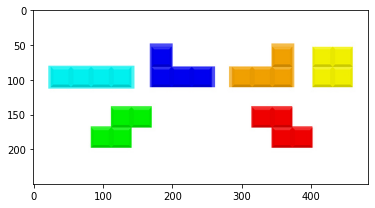

In [52]:
image = cv2.imread('./datasets/tetris_blocks.png')

plt.imshow(image[:, :, ::-1])

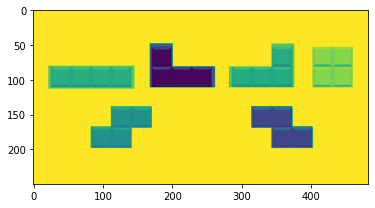

In [57]:
# using cv2.cvtColor method
gray = cv2.cvtColor(image,cv2.COLOR_BGRA2GRAY)
plt.imshow(gray[:, :]) # -> depth 가 없어서
# plt.imshow(gray,cmap = 'gray')

### Edge detection

Edge detection는 이미지에서 객체의 경계를 찾는 데 유용하며 세분화(segmentation)에 효과적입니다.

In [58]:
# using cv2.Canny method
# minVal = 30, maxVal = 150

#insert code
edged = cv2.Canny(gray, 30,150)

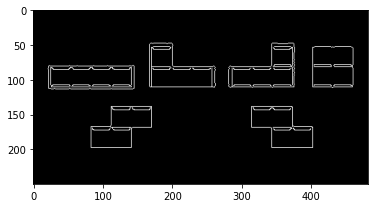

In [59]:
plt.imshow(edged, cmap='gray')

### Thresholding

이미지 thresholding은 이미지 처리 파이프 라인의 중요한 중개 단계입니다. 임계 값을 사용하면 밝거나 어두운 영역, 윤곽선을 제거하는 데 도움이 됩니다.

* gray 이미지에서 225보다 큰 모든 픽셀을 잡아서 이미지의 배경에 해당하는 0 (검정)으로 설정합니다.
* 이미지의 전경 (즉, Tetris 블록 자체)에 해당하는 225보다 큰 픽셀 값들을 255 (흰색)로 설정합니다.

배경에서 전경을 이진 이미지로 세분화하는 것은 윤곽을 찾는 데 중요합니다 (다음 단계).

In [70]:
thresh = cv2.threshold(gray, 225,255,cv2.THRESH_BINARY_INV)[1]


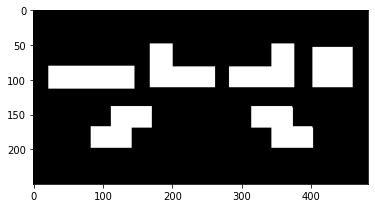

In [71]:
plt.imshow(thresh, cmap='gray')

### Detecting and drawing contours

cv2.findContours를 사용하여 이미지의 윤곽선을 감지합니다. 

알고리즘은 thresh.copy() 이미지에서 모든 전경 (흰색) 픽셀을 찾습니다.

원본 이미지의 사본(output)을 만들고, 윤곽선을 그릴 수 있습니다.

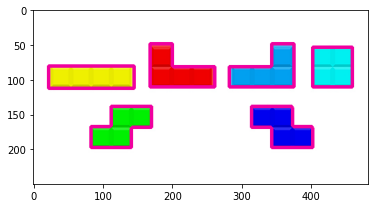

In [72]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
    cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

    plt.imshow(output)

이 이미지의 총 개체 수를 계산하는 것은 윤곽선 리스트 길이 len(cnts)을 확인하는 것으로 간단합니다.

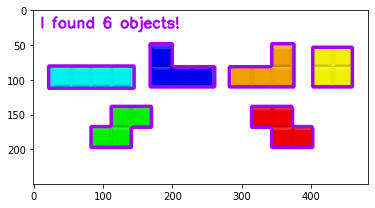

In [73]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (240, 0, 159), 2)

plt.imshow(output[:, :, ::-1])

### Erosions and Dilations

침식과 팽창은 일반적으로 이진 이미지의 노이즈를 줄이기 위해 사용됩니다.

출력 결과를 보면 테트리스 윤곽선으로 생성된 마스크는 약간 더 작습니다.

In [ ]:
mask = thresh.copy()

In [ ]:
# insert code

In [ ]:
plt.imshow(mask, cmap='gray')

영역을 팽창(dilations)하려면 cv2.dilate를 사용하십시오.

In [ ]:
mask = thresh.copy()

In [ ]:
# insert code

In [ ]:
plt.imshow(mask, cmap='gray')

### Masking and bitwise operations

마스크를 사용하면 관심이 없는 이미지의 영역을 “mask out” 할 수 있습니다. 

고려하지 않는 이미지 영역을 숨길 수 있기 때문에 “masks”라고 부릅니다.

cv2.bitwise_and를 사용하여 thresh 이미지와 원본 이미지의 픽셀을 비트 단위로 AND 연산을 합니다.

In [ ]:
mask = thresh.copy()

In [ ]:
# insert code

In [ ]:
plt.imshow(output[:, :, ::-1])